In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip

In [2]:
class Network(object):
    def __init__(self, n):
        # Initialize the weights randomly
        self.W = np.random.randn(n, 784)
        self.b = np.random.randn(n)
        self.V = np.random.randn(10, n)
        self.bprime = np.random.randn(10)
        
    def feedforward(self, x):
        # Return the output of a feedforward pass
        a = sigmoid(np.dot(self.W, x)+self.b)
        return sigmoid(np.dot(self.V, a)+self.bprime)
    
    def evaluate(self, data):
        """ Return (cost, accuracy) on the data"""
        correct_samples = 0
        total_cost = 0
        n_samples = len(data)
        
        for x, ylabel in data:
            y = self.feedforward(x)
            prediction = np.argmax(y)
            if prediction == ylabel:
                correct_samples += 1
            
            y[ylabel] -= 1.0
            total_cost += 0.5*np.dot(y, y)
        
        return total_cost / n_samples, correct_samples / n_samples
            
    
    def update_mini_batch(self, mini_batch, eta):
        # Run backprop and update weights on the minibatch
        k = len(mini_batch)
        delta_W = np.zeros(self.W.shape)
        delta_b = np.zeros(self.b.shape)
        delta_V = np.zeros(self.V.shape)
        delta_bprime = np.zeros(self.bprime.shape)
        
        for x, y in mini_batch:
            nabla_W, nabla_b, nabla_V, \
                nabla_bprime = self.backprop(x, y)
            delta_W += nabla_W
            delta_b += nabla_b
            delta_V += nabla_V
            delta_bprime += nabla_bprime
        
        self.W -= eta/k * delta_W
        self.b -= eta/k * delta_b
        self.V -= eta/k * delta_V
        self.bprime -= eta/k * delta_bprime

    def SGD(self, training_data, epochs, mini_batch_size, 
            eta, test_data=[]):
        # Run SGD with those parameters
        # Return a list of results for every epoch
        # For each epoch, append pair (self.evaluate(training_data), 
        #        self.evaluate(test_data))
        res = []

        for i in range(epochs):
            np.random.shuffle(training_data)
            for j in range(0, len(training_data), mini_batch_size):
                mini_batch = training_data[j:j+mini_batch_size]
                self.update_mini_batch(mini_batch, eta)
                
            res.append((self.evaluate(training_data),
                       self.evaluate(test_data)))
            
            print('Epoch '+str(i)+' finished')
        
        return res
        
    
### THE PART BELOW WILL BE EXPLAINED LATER
        
    def backprop(self, x, y):
        # feedforward
        z1 = np.dot(self.W, x)+self.b
        a1 = sigmoid(z1)
        z2 = np.dot(self.V, a1)+self.bprime
        a2 = sigmoid(z2)
        
        # backward
        delta_2 = self.cost_derivative(a2, y) * sigmoid_prime(z2)
        nabla_bprime = delta_2
        nabla_V = np.outer(delta_2, a1)
        
        delta_1 = np.dot(self.V.transpose(), delta_2) * sigmoid_prime(z1)
        nabla_b = delta_1
        nabla_W = np.outer(delta_1, x)
        
        return nabla_W, nabla_b, nabla_V, nabla_bprime
            
    def cost_derivative(self, output_activations, ylabel):
        r"""Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-Network.vec_output[ylabel])
    
    vec_output = []
    for ylabel in range(10):
        V = np.zeros(10)
        V[ylabel] = 1
        vec_output.append(V)  

In [3]:
def sigmoid(z):
    return 1 / (1.0+np.exp(-z))
def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

In [4]:
def load_data():
    # Note you have to update the path below
    f = gzip.open("../Downloads/mnist.pkl.gz","rb")
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return training_data, validation_data, test_data

In [5]:
TRAIN, VALIDATION, TEST = load_data()

In [6]:
len(TRAIN), len(TRAIN[0]), len(TRAIN[1])

(2, 50000, 50000)

In [7]:
TRAIN[0][0].shape, TRAIN[1][0]

((784,), 5)

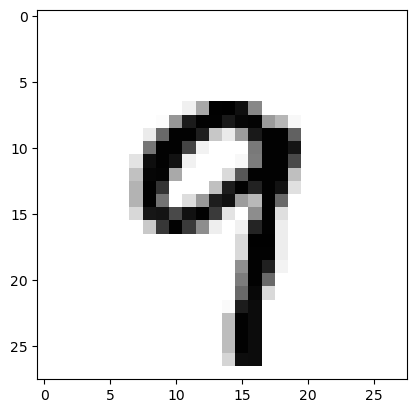

In [8]:
IM = np.reshape(TRAIN[0][170], (28, 28))
plt.imshow(1-IM, cmap='gray')
plt.show()

In [9]:
TRAIN[1][170]

9

In [10]:
def zip_data(D):
    return list(zip(D[0], D[1]))

In [11]:
train_data = zip_data(TRAIN)
validation_data = zip_data(VALIDATION)
test_data = zip_data(TEST)

In [12]:
NET3 = Network(30)
results3 = NET3.SGD(train_data, 30, 10, 3.0, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


In [13]:
def plot_results(res):
    X = list(range(len(res)))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    train_acc = [x[0][1] for x in res]
    test_acc = [x[1][1] for x in res]
    ax1.plot(X, train_acc, label='train',color='red')
    ax1.plot(X, test_acc, label='test',color='maroon')
    ax1.set_title('Accuracy')
    ax1.legend()
    
    train_cost = [x[0][0] for x in res]
    test_cost = [x[1][0] for x in res]
    ax2.plot(X, train_cost, label='train',color='green')
    ax2.plot(X, test_cost, label='test',color ='black')
    ax2.set_title('Loss')
    ax2.legend()

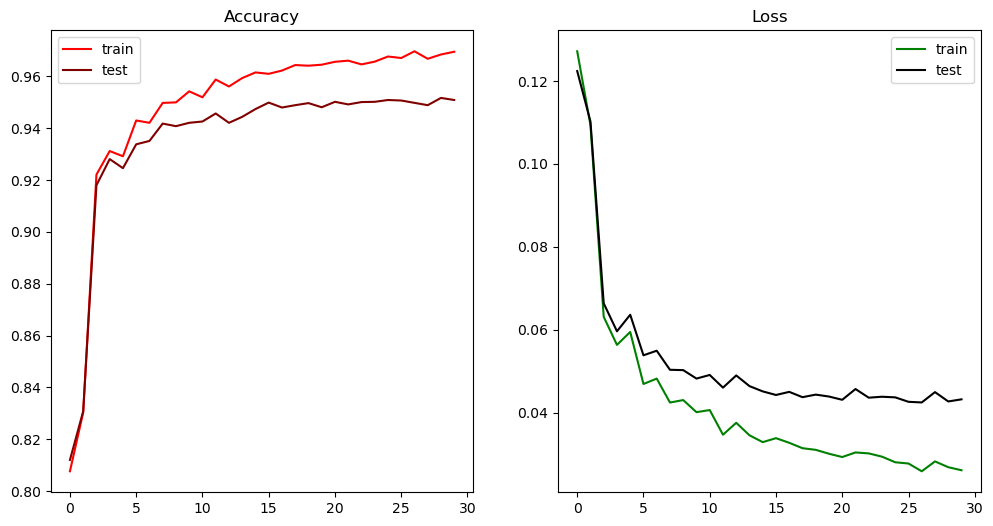

In [14]:
plot_results(results3)

In [15]:
np.max([x[1][1] for x in results3])

0.9517

## • Increase the number of neurons.

#### for n = 50

In [16]:
NET = Network(50)

In [17]:
results3 = NET.SGD(train_data, 30, 10, 3.0, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


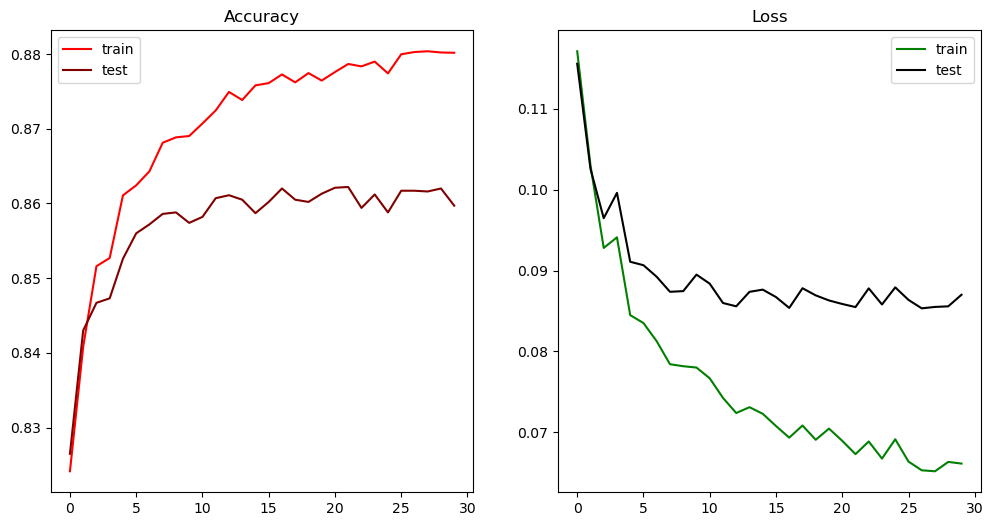

In [18]:
plot_results(results3)

In [19]:
np.max([x[1][1] for x in results3])

0.8622

#### for n = 70

In [20]:
NET = Network(70)

In [21]:
results3 = NET.SGD(train_data, 30, 10, 3.0, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


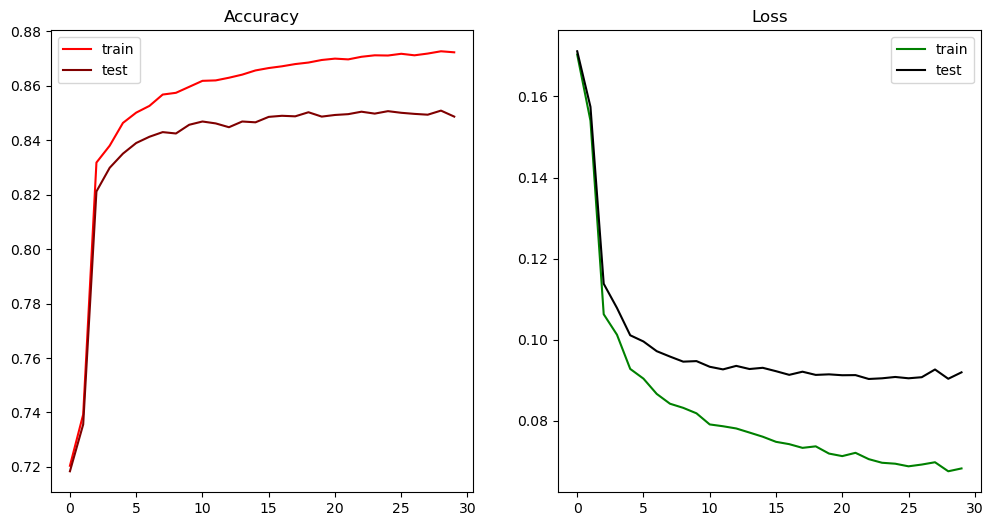

In [22]:
plot_results(results3)

In [23]:
np.max([x[1][1] for x in results3])

0.8509

#### for n = 100

In [24]:
NET = Network(100)

In [25]:
results3 = NET.SGD(train_data, 30, 10, 3.0, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


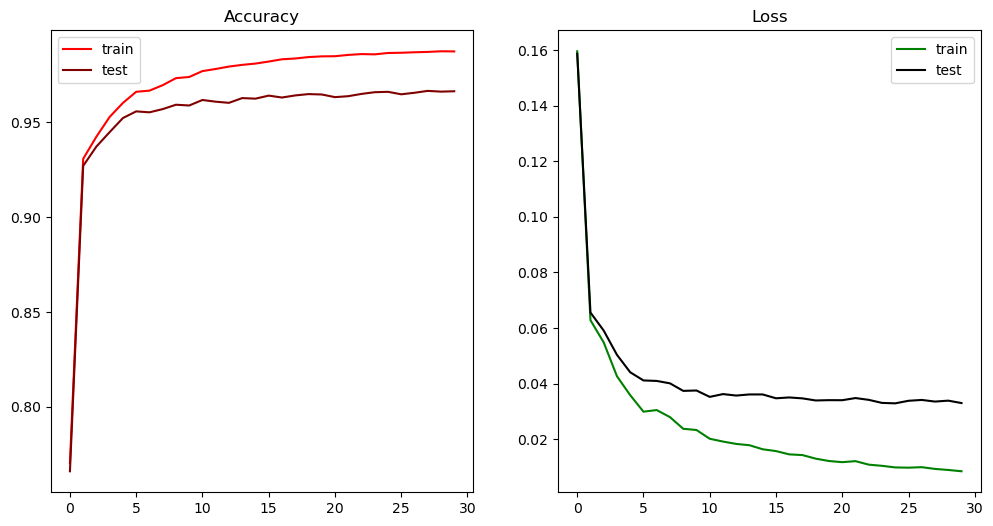

In [26]:
plot_results(results3)

In [27]:
np.max([x[1][1] for x in results3])

0.9665

#### for n = 130

In [28]:
NET = Network(150)
results3 = NET.SGD(train_data, 30, 10, 3.0, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


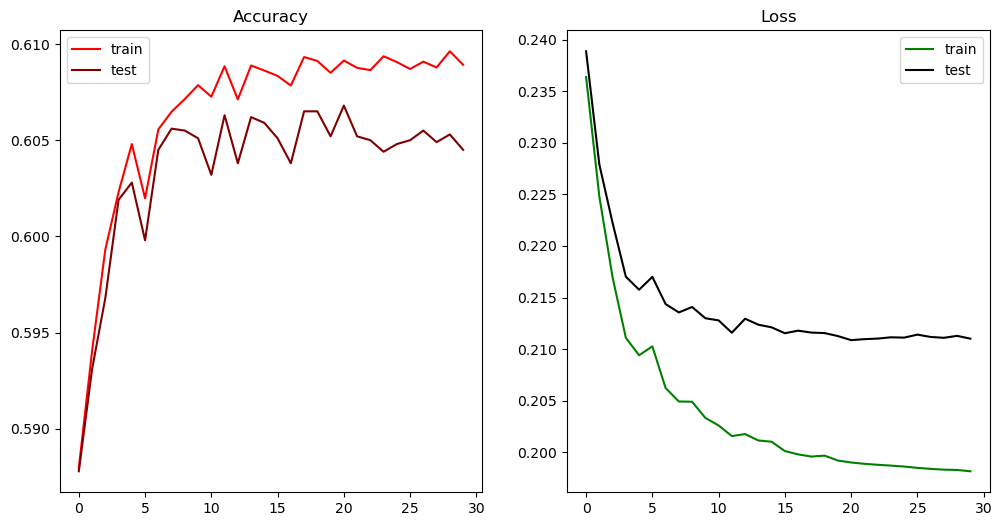

In [29]:
plot_results(results3)

In [30]:
np.max([x[1][1] for x in results3])

0.6068

#### for n = 150

In [31]:
NET = Network(150)

In [32]:
results3 = NET.SGD(train_data, 30, 10, 3.0, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


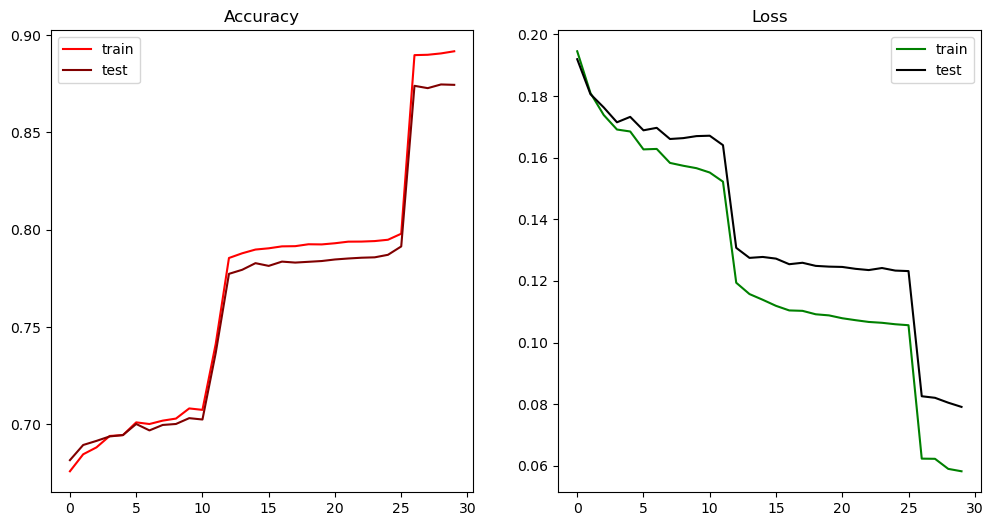

In [33]:
plot_results(results3)

In [34]:
np.max([x[1][1] for x in results3])

0.8747

####  About interpretation

 We notice that when the number of neurons exceeds 100, the accuracy decreases, making it challenging for the neural network to predict the correct values.

## Change the activation function (eg., ReLU) and/or the cost function (eg., cross-entropy or one of its variants).

### Change the activation function ( ReLU)

In [35]:
def Relu(x):
    if x<0:
        return 0
    else:
        return x
Relu=np.vectorize(Relu)

In [36]:
def Relu_prime(x):
    if x<0:
        return 0
    else:
        return 1
Relu_prime=np.vectorize(Relu_prime)

In [37]:
class Network(object):
    def __init__(self, n):
        # Initialize the weights randomly
        self.W = np.random.randn(n, 784)
        self.b = np.random.randn(n)
        self.V = np.random.randn(10, n)
        self.bprime = np.random.randn(10)
        
    def feedforward(self, x):
        # Return the output of a feedforward pass
        a = Relu(np.dot(self.W, x)+self.b)
        return Relu(np.dot(self.V, a)+self.bprime)
    
    def evaluate(self, data):
        """ Return (cost, accuracy) on the data"""
        correct_samples = 0
        total_cost = 0
        n_samples = len(data)
        
        for x, ylabel in data:
            y = self.feedforward(x)
            prediction = np.argmax(y)
            if prediction == ylabel:
                correct_samples += 1
            
            y[ylabel] -= 1.0
            total_cost += 0.5*np.dot(y, y)
        
        return total_cost / n_samples, correct_samples / n_samples
            
    
    def update_mini_batch(self, mini_batch, eta):
        # Run backprop and update weights on the minibatch
        k = len(mini_batch)
        delta_W = np.zeros(self.W.shape)
        delta_b = np.zeros(self.b.shape)
        delta_V = np.zeros(self.V.shape)
        delta_bprime = np.zeros(self.bprime.shape)
        
        for x, y in mini_batch:
            nabla_W, nabla_b, nabla_V, \
                nabla_bprime = self.backprop(x, y)
            delta_W += nabla_W
            delta_b += nabla_b
            delta_V += nabla_V
            delta_bprime += nabla_bprime
        
        self.W -= eta/k * delta_W
        self.b -= eta/k * delta_b
        self.V -= eta/k * delta_V
        self.bprime -= eta/k * delta_bprime

    def SGD(self, training_data, epochs, mini_batch_size, 
            eta, test_data=[]):
        # Run SGD with those parameters
        # Return a list of results for every epoch
        # For each epoch, append pair (self.evaluate(training_data), 
        #        self.evaluate(test_data))
        res = []

        for i in range(epochs):
            np.random.shuffle(training_data)
            for j in range(0, len(training_data), mini_batch_size):
                mini_batch = training_data[j:j+mini_batch_size]
                self.update_mini_batch(mini_batch, eta)
                
            res.append((self.evaluate(training_data),
                       self.evaluate(test_data)))
            
            print('Epoch '+str(i)+' finished')
        
        return res
        
    
### THE PART BELOW WILL BE EXPLAINED LATER
        
    def backprop(self, x, y):
        # feedforward
        z1 = np.dot(self.W, x)+self.b
        a1 = Relu(z1)
        z2 = np.dot(self.V, a1)+self.bprime
        a2 = Relu(z2)
        
        # backward
        delta_2 = self.cost_derivative(a2, y) * Relu_prime(z2)
        nabla_bprime = delta_2
        nabla_V = np.outer(delta_2, a1)
        
        delta_1 = np.dot(self.V.transpose(), delta_2) * Relu_prime(z1)
        nabla_b = delta_1
        nabla_W = np.outer(delta_1, x)
        
        return nabla_W, nabla_b, nabla_V, nabla_bprime
            
    def cost_derivative(self, output_activations, ylabel):
        r"""Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-Network.vec_output[ylabel])
    
    vec_output = []
    for ylabel in range(10):
        V = np.zeros(10)
        V[ylabel] = 1
        vec_output.append(V)  

In [38]:
NET = Network(70)
results3 = NET.SGD(train_data, 30, 10, 3.0, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


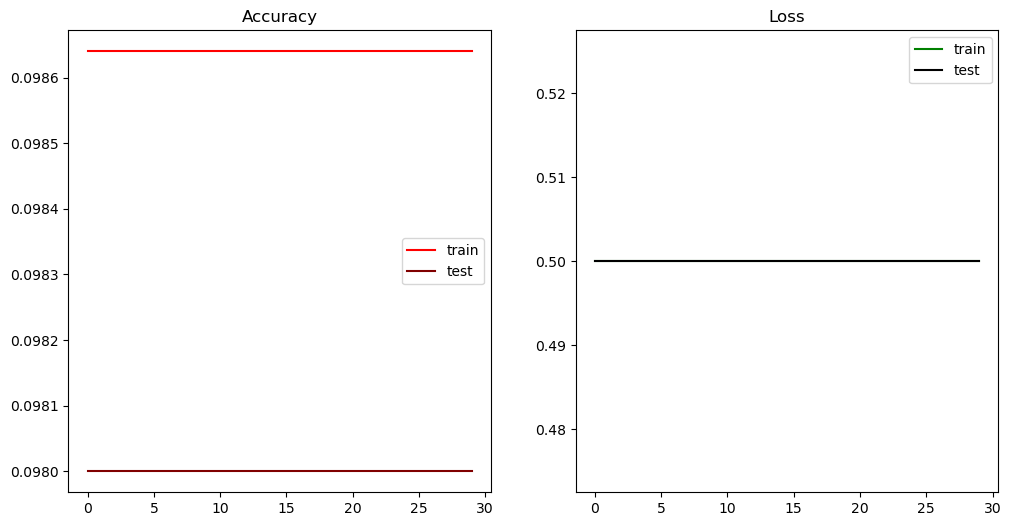

In [39]:
plot_results(results3)

In [40]:
np.max([x[1][1] for x in results3])

0.098

### - The cost function (eg., cross-entropy or one of its variants)

In [41]:
class Network(object):
    def __init__(self, n):
        # Initialize the weights randomly
        self.W = np.random.randn(n, 784)
        self.b = np.random.randn(n)
        self.V = np.random.randn(10, n)
        self.bprime = np.random.randn(10)
        
    def feedforward(self, x):
        # Return the output of a feedforward pass
        a = Relu(np.dot(self.W, x)+self.b)
        return Relu(np.dot(self.V, a)+self.bprime)
    
    def evaluate(self, data):
        """ Return (cost, accuracy) on the data"""
        correct_samples = 0
        total_cost = 0
        n_samples = len(data)
        
        for x, ylabel in data:
            y = self.feedforward(x)
            prediction = np.argmax(y)
            if prediction == ylabel:
                correct_samples += 1
            
            y[ylabel] -= 1.0
            total_cost += -y*np.log(y)-(1-y)*np.log(1-y)
        
        return total_cost / n_samples, correct_samples / n_samples
            
    
    def update_mini_batch(self, mini_batch, eta):
        # Run backprop and update weights on the minibatch
        k = len(mini_batch)
        delta_W = np.zeros(self.W.shape)
        delta_b = np.zeros(self.b.shape)
        delta_V = np.zeros(self.V.shape)
        delta_bprime = np.zeros(self.bprime.shape)
        
        for x, y in mini_batch:
            nabla_W, nabla_b, nabla_V, \
                nabla_bprime = self.backprop(x, y)
            delta_W += nabla_W
            delta_b += nabla_b
            delta_V += nabla_V
            delta_bprime += nabla_bprime
        
        self.W -= eta/k * delta_W
        self.b -= eta/k * delta_b
        self.V -= eta/k * delta_V
        self.bprime -= eta/k * delta_bprime

    def SGD(self, training_data, epochs, mini_batch_size, 
            eta, test_data=[]):
        # Run SGD with those parameters
        # Return a list of results for every epoch
        # For each epoch, append pair (self.evaluate(training_data), 
        #        self.evaluate(test_data))
        res = []

        for i in range(epochs):
            np.random.shuffle(training_data)
            for j in range(0, len(training_data), mini_batch_size):
                mini_batch = training_data[j:j+mini_batch_size]
                self.update_mini_batch(mini_batch, eta)
                
            res.append((self.evaluate(training_data),
                       self.evaluate(test_data)))
            
            print('Epoch '+str(i)+' finished')
        
        return res
        
    
### THE PART BELOW WILL BE EXPLAINED LATER
        
    def backprop(self, x, y):
        # feedforward
        z1 = np.dot(self.W, x)+self.b
        a1 = Relu(z1)
        z2 = np.dot(self.V, a1)+self.bprime
        a2 = Relu(z2)
        
        # backward
        delta_2 = self.cost_derivative(a2, y) * Relu_prime(z2)
        nabla_bprime = delta_2
        nabla_V = np.outer(delta_2, a1)
        
        delta_1 = np.dot(self.V.transpose(), delta_2) * Relu_prime(z1)
        nabla_b = delta_1
        nabla_W = np.outer(delta_1, x)
        
        return nabla_W, nabla_b, nabla_V, nabla_bprime
            
    def cost_derivative(self, output_activations, ylabel):
        r"""Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-Network.vec_output[ylabel])
    
    vec_output = []
    for ylabel in range(10):
        V = np.zeros(10)
        V[ylabel] = 1
        vec_output.append(V)  

In [42]:
NET = Network(70)
results3 = NET.SGD(train_data, 30, 10, 3.0, test_data)

C:\Users\Edissa\AppData\Local\Temp\ipykernel_9976\669790863.py:27: RuntimeWarning: divide by zero encountered in log
  total_cost += -y*np.log(y)-(1-y)*np.log(1-y)
C:\Users\Edissa\AppData\Local\Temp\ipykernel_9976\669790863.py:27: RuntimeWarning: invalid value encountered in log
  total_cost += -y*np.log(y)-(1-y)*np.log(1-y)
C:\Users\Edissa\AppData\Local\Temp\ipykernel_9976\669790863.py:27: RuntimeWarning: invalid value encountered in multiply
  total_cost += -y*np.log(y)-(1-y)*np.log(1-y)


Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


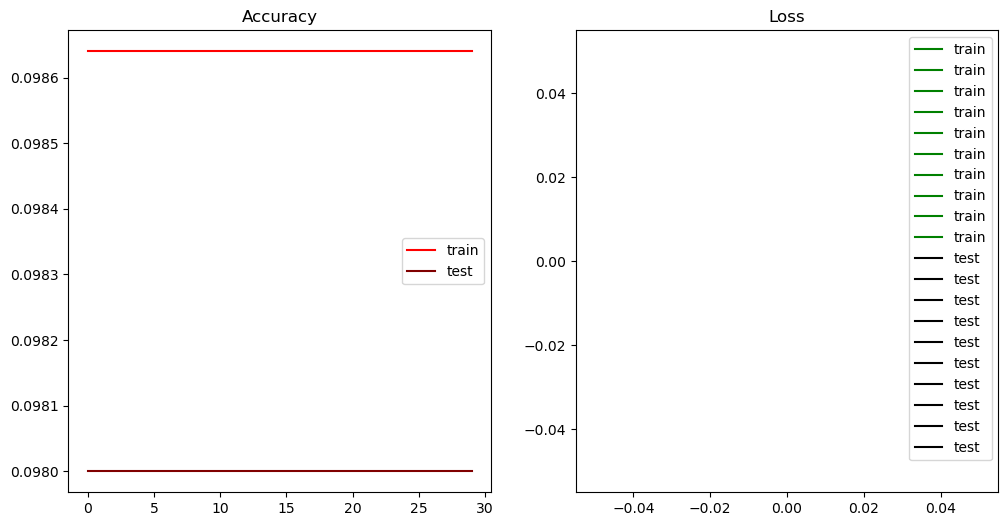

In [43]:
plot_results(results3)

In [44]:
np.max([x[1][1] for x in results3])

0.098

In [63]:
results3

[((0.015397225448775226, 0.9794), (0.04244813155983403, 0.9535)),
 ((0.015408679480052522, 0.9792), (0.042223919895622734, 0.9539)),
 ((0.015385136983571147, 0.97936), (0.042474684321946884, 0.9542)),
 ((0.015383219002377541, 0.97958), (0.042575392472702735, 0.9538)),
 ((0.015345240694725875, 0.97948), (0.0424080147178182, 0.9545)),
 ((0.015346550934714714, 0.97944), (0.04239310772388304, 0.9538)),
 ((0.015295925662875272, 0.97948), (0.04215938139072314, 0.9543)),
 ((0.015260737402048976, 0.97958), (0.0424203975965333, 0.9539)),
 ((0.01528961657741782, 0.97954), (0.04259767199665367, 0.9542)),
 ((0.015329124994129853, 0.97948), (0.04283742633742952, 0.9542)),
 ((0.015296193528045222, 0.9796), (0.04268108568450611, 0.9539)),
 ((0.015217987981079675, 0.97962), (0.04249515649863921, 0.954)),
 ((0.015196053563004318, 0.9795), (0.04242648866156038, 0.9542)),
 ((0.015234038722823102, 0.9794), (0.04260685633488018, 0.9546)),
 ((0.015183005152752269, 0.9795), (0.04264110637523716, 0.9538)),
 (

In [65]:
neuron_index = 7
zero_activations = []
one_activations = []
for x, ylabel in test_data:
    if ylabel == 0:
        a = sigmoid(np.dot(NET.W[neuron_index], x)+NET.b[neuron_index])
        zero_activations.append(a)
    if ylabel == 1:
        a = sigmoid(np.dot(NET.W[neuron_index], x)+NET.b[neuron_index])
        one_activations.append(a)     

In [66]:
len(zero_activations), len(one_activations)

(980, 1135)

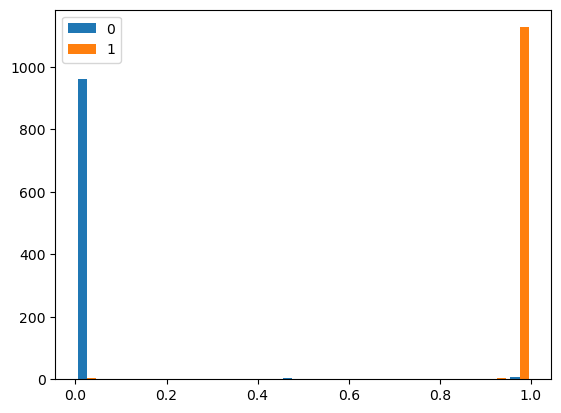

In [71]:
plt.hist([zero_activations, one_activations], bins=20, 
          range=(0, 1), label=['0', '1'])
plt.legend()
plt.show()

In [72]:
neuron_weights = np.reshape(NET.W[neuron_index], (28, 28))

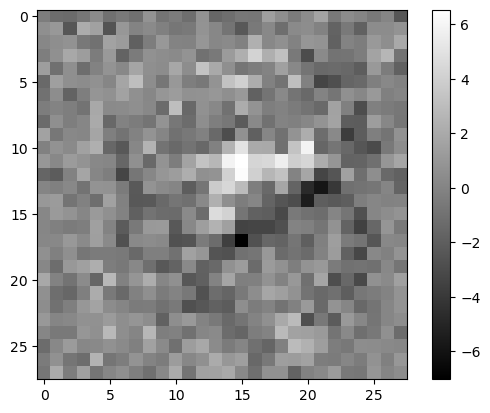

In [74]:
plt.imshow(neuron_weights, cmap='gray')
plt.colorbar()
plt.show()

## change the mini-batch

In [45]:
class Network(object):
    def __init__(self, n):
        # Initialize the weights randomly
        self.W = np.random.randn(n, 784)
        self.b = np.random.randn(n)
        self.V = np.random.randn(10, n)
        self.bprime = np.random.randn(10)
        
    def feedforward(self, x):
        # Return the output of a feedforward pass
        a = sigmoid(np.dot(self.W, x)+self.b)
        return sigmoid(np.dot(self.V, a)+self.bprime)
    
    def evaluate(self, data):
        """ Return (cost, accuracy) on the data"""
        correct_samples = 0
        total_cost = 0
        n_samples = len(data)
        
        for x, ylabel in data:
            y = self.feedforward(x)
            prediction = np.argmax(y)
            if prediction == ylabel:
                correct_samples += 1
            
            y[ylabel] -= 1.0
            total_cost += 0.5*np.dot(y, y)
        
        return total_cost / n_samples, correct_samples / n_samples
            
    
    def update_mini_batch(self, mini_batch, eta):
        # Run backprop and update weights on the minibatch
        k = len(mini_batch)
        delta_W = np.zeros(self.W.shape)
        delta_b = np.zeros(self.b.shape)
        delta_V = np.zeros(self.V.shape)
        delta_bprime = np.zeros(self.bprime.shape)
        
        for x, y in mini_batch:
            nabla_W, nabla_b, nabla_V, \
                nabla_bprime = self.backprop(x, y)
            delta_W += nabla_W
            delta_b += nabla_b
            delta_V += nabla_V
            delta_bprime += nabla_bprime
        
        self.W -= eta/k * delta_W
        self.b -= eta/k * delta_b
        self.V -= eta/k * delta_V
        self.bprime -= eta/k * delta_bprime

    def SGD(self, training_data, epochs, mini_batch_size, 
            eta, test_data=[]):
        # Run SGD with those parameters
        # Return a list of results for every epoch
        # For each epoch, append pair (self.evaluate(training_data), 
        #        self.evaluate(test_data))
        res = []

        for i in range(epochs):
            np.random.shuffle(training_data)
            for j in range(0, len(training_data), mini_batch_size):
                mini_batch = training_data[j:j+mini_batch_size]
                self.update_mini_batch(mini_batch, eta)
                
            res.append((self.evaluate(training_data),
                       self.evaluate(test_data)))
            
            print('Epoch '+str(i)+' finished')
        
        return res
        
    
### THE PART BELOW WILL BE EXPLAINED LATER
        
    def backprop(self, x, y):
        # feedforward
        z1 = np.dot(self.W, x)+self.b
        a1 = sigmoid(z1)
        z2 = np.dot(self.V, a1)+self.bprime
        a2 = sigmoid(z2)
        
        # backward
        delta_2 = self.cost_derivative(a2, y) * sigmoid_prime(z2)
        nabla_bprime = delta_2
        nabla_V = np.outer(delta_2, a1)
        
        delta_1 = np.dot(self.V.transpose(), delta_2) * sigmoid_prime(z1)
        nabla_b = delta_1
        nabla_W = np.outer(delta_1, x)
        
        return nabla_W, nabla_b, nabla_V, nabla_bprime
            
    def cost_derivative(self, output_activations, ylabel):
        r"""Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-Network.vec_output[ylabel])
    
    vec_output = []
    for ylabel in range(10):
        V = np.zeros(10)
        V[ylabel] = 1
        vec_output.append(V)  

### for k=5

In [46]:
NET = Network(30)

In [47]:
results3 = NET.SGD(train_data, 30, 5, 3.0, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


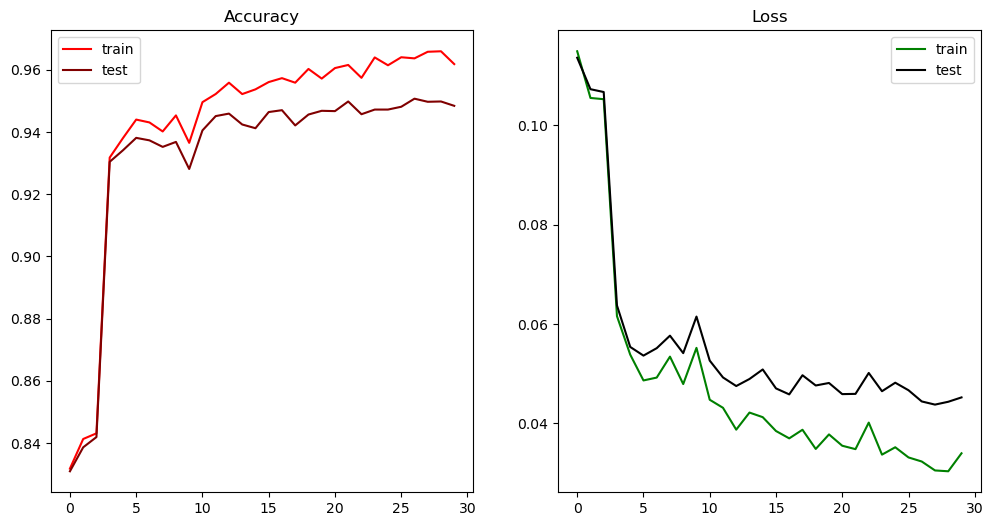

In [48]:
plot_results(results3)

In [49]:
np.max([x[1][1] for x in results3])

0.9507

### for k=14

In [50]:
results3 = NET.SGD(train_data, 30, 14, 3.0, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


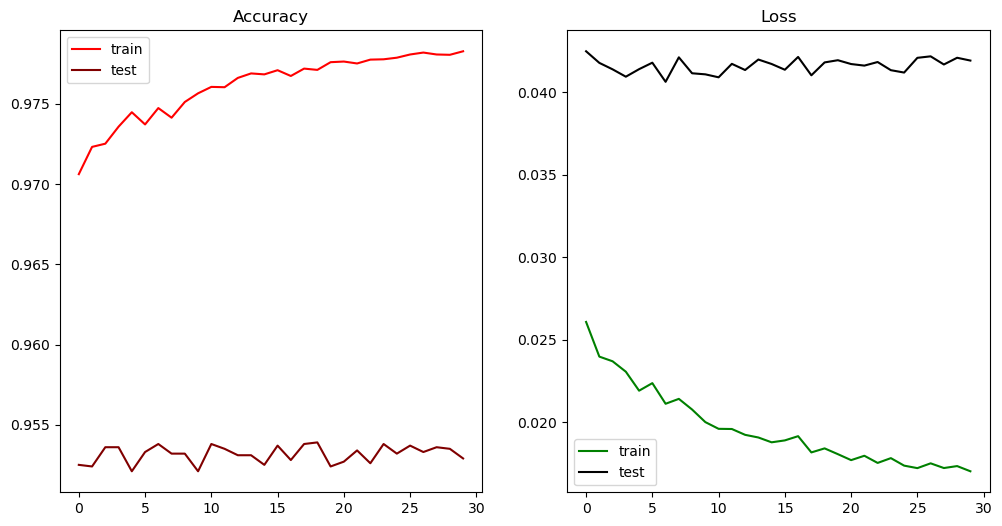

In [51]:
plot_results(results3)

In [52]:
np.max([x[1][1] for x in results3])

0.9539

### for k=24

In [53]:
results3 = NET.SGD(train_data, 30, 24, 3.0, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


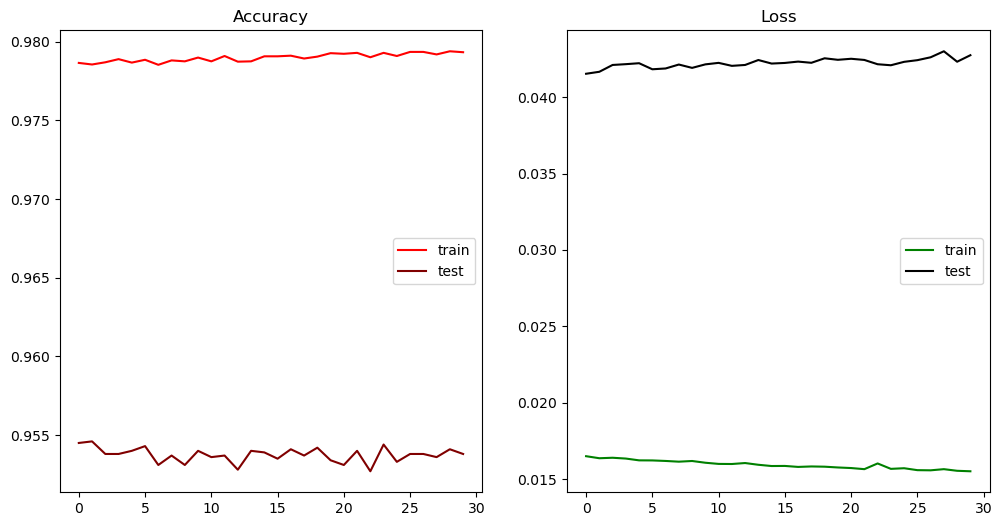

In [54]:
plot_results(results3)

In [55]:
np.max([x[1][1] for x in results3])

0.9546

### for k=30

In [56]:
results3 = NET.SGD(train_data, 30, 30, 3.0, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


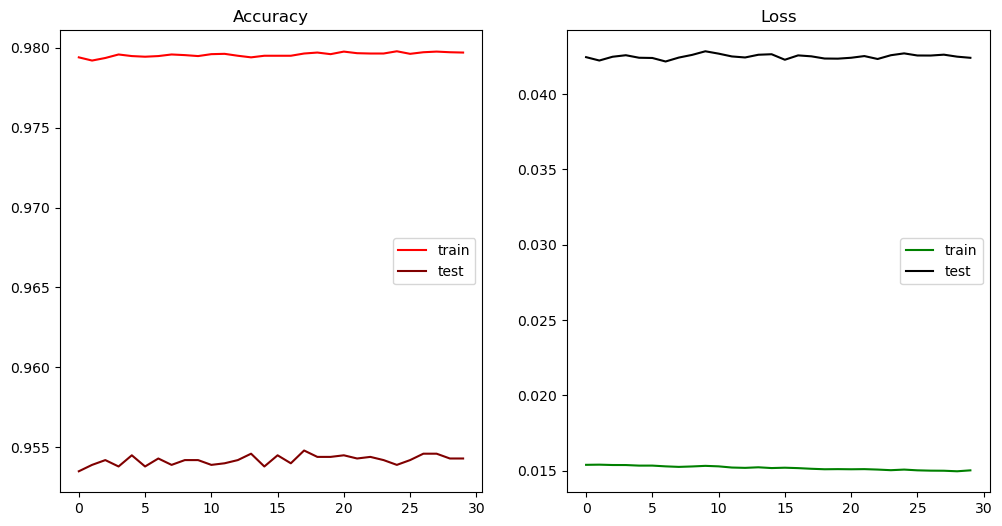

In [57]:
plot_results(results3)

In [58]:
np.max([x[1][1] for x in results3])

0.9548

#  Add another layer to the network.
Introducing an additional layer enhanced the model's performance by augmenting its ability to learn intricate patterns within the data. However, excessive layer additions can lead to overfitting. Additionally, the model's computational speed might decrease due to the increased calculations involved.

In [79]:
import time
class Network(object):
    def __init__(self, n, m):
        # Initialize the weights randomly
        self.W1 = np.random.randn(n, 784) 
        self.b1 = np.random.randn(n)       
        self.W2 = np.random.randn(m, n)    
        self.b2 = np.random.randn(m)       
        self.V = np.random.randn(10, m)    
        self.bprime = np.random.randn(10)  
       
        
    def feedforward(self, x):
     
        z1 = np.dot(self.W1, x) + self.b1
        a1 = sigmoid(z1)
        z2 = np.dot(self.W2, a1) + self.b2
        a2 = sigmoid(z2)
        return sigmoid(np.dot(self.V, a2) + self.bprime)
    
    def evaluate(self, data):
        """ Return (cost, accuracy) on the data"""
        correct_samples = 0
        total_cost = 0
        n_samples = len(data)
        
        for x, ylabel in data:
            y = self.feedforward(x)
            prediction = np.argmax(y)
            if prediction == ylabel:
                correct_samples += 1
            
            y[ylabel] -= 1.0
            total_cost += 0.5*np.dot(y, y)
        
        return total_cost / n_samples, correct_samples / n_samples
            
    
    def update_mini_batch(self, mini_batch, eta):
       
        k = len(mini_batch)
        delta_W1 = np.zeros(self.W1.shape)
        delta_b1 = np.zeros(self.b1.shape)
        delta_W2 = np.zeros(self.W2.shape)
        delta_b2 = np.zeros(self.b2.shape)
        delta_V = np.zeros(self.V.shape)
        delta_bprime = np.zeros(self.bprime.shape)
       
        for x, y in mini_batch:
            nabla_W1, nabla_b1, nabla_W2, nabla_b2, \
                nabla_V, nabla_bprime = self.backprop(x, y)
            delta_W1 += nabla_W1
            delta_b1 += nabla_b1
            delta_W2 += nabla_W2
            delta_b2 += nabla_b2
            delta_V += nabla_V
            delta_bprime += nabla_bprime
       
        self.W1 -= eta / k * delta_W1
        self.b1 -= eta / k * delta_b1
        self.W2 -= eta / k * delta_W2
        self.b2 -= eta / k * delta_b2
        self.V -= eta / k * delta_V
        self.bprime -= eta / k * delta_bprime
        
    def SGD(self, training_data, epochs, mini_batch_size, 
            eta, test_data=[]):
      
        res = []

        for i in range(epochs):
            np.random.shuffle(training_data)
            for j in range(0, len(training_data), mini_batch_size):
                mini_batch = training_data[j:j + mini_batch_size]
                self.update_mini_batch(mini_batch, eta)
               
            res.append((self.evaluate(training_data),
                        self.evaluate(test_data)))
           
            print('Epoch ' + str(i) + ' finished')
       
        return res
        

        
    def backprop(self, x, y):
        # feedforward
        z1 = np.dot(self.W1, x) + self.b1
        a1 = sigmoid(z1)
        z2 = np.dot(self.W2, a1) + self.b2
        a2 = sigmoid(z2)
        z3 = np.dot(self.V, a2) + self.bprime
        a3 = sigmoid(z3)
       
        # backward
        delta_3 = self.cost_derivative(a3, y) * sigmoid_prime(z3)
        nabla_bprime = delta_3
        nabla_V = np.outer(delta_3, a2)
       
        delta_2 = np.dot(self.V.T, delta_3) * sigmoid_prime(z2)
        nabla_b2 = delta_2
        nabla_W2 = np.outer(delta_2, a1)
       
        delta_1 = np.dot(self.W2.T, delta_2) * sigmoid_prime(z1)
        nabla_b1 = delta_1
        nabla_W1 = np.outer(delta_1, x)
       
        return nabla_W1, nabla_b1, nabla_W2, nabla_b2, nabla_V, nabla_bprime
           
    def cost_derivative(self, output_activations, ylabel):
        r"""Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations - Network.vec_output[ylabel])
   
    vec_output = []
    for ylabel in range(10):
        V = np.zeros(10)
        V[ylabel] = 1
        vec_output.append(V)

In [80]:
NET = Network(30,59)

In [81]:
results3 = NET.SGD(train_data, 30, 10, 3.0, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


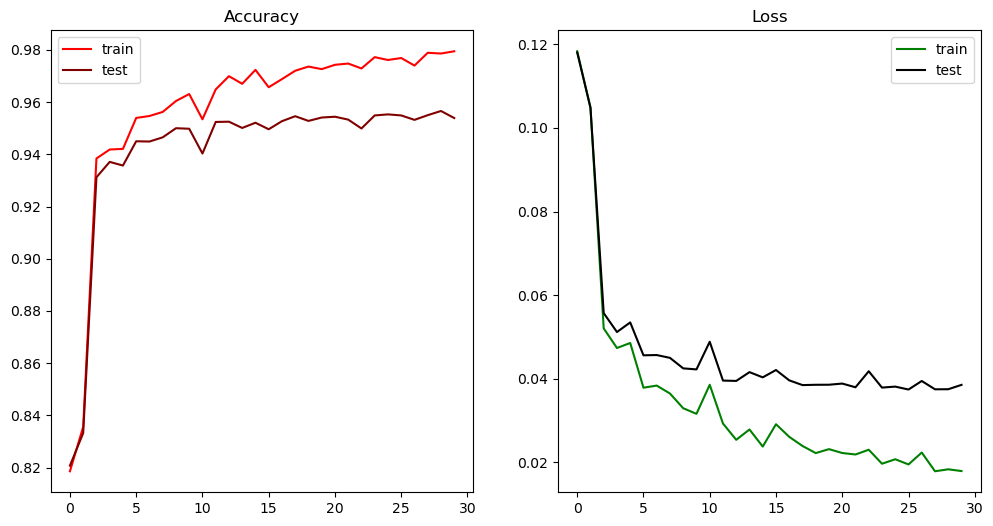

In [82]:
plot_results(results3)

In [85]:
np.max([x[1][1] for x in results3])

0.9566

 ## Add L2 regularization.
 
The L2 regularizer helps prevent overfitting by incorporating a term in the cost function that depends on the sum of squares of all weights. To integrate this regularization into the update_mini_batch function, we introduce a parameter to control its strength. A higher value for this parameter leads to a simpler model.

In [83]:
class Network(object):
    def __init__(self, n, lmbda):
        # Initialize the weights randomly
        self.W = np.random.randn(n, 784)
        self.b = np.random.randn(n)
        self.V = np.random.randn(10, n)
        self.bprime = np.random.randn(10)
        self.lmbda = lmbda
        
    def feedforward(self, x):
        # Return the output of a feedforward pass
        a = sigmoid(np.dot(self.W, x)+self.b)
        return sigmoid(np.dot(self.V, a)+self.bprime)
    
    def evaluate(self, data):
        """ Return (cost, accuracy) on the data"""
        correct_samples = 0
        total_cost = 0
        n_samples = len(data)
        
        for x, ylabel in data:
            y = self.feedforward(x)
            prediction = np.argmax(y)
            if prediction == ylabel:
                correct_samples += 1
            
            y[ylabel] -= 1.0
            total_cost += 0.5*np.dot(y, y)
            
        regularization_term = 0.5 * self.lmbda * (np.sum(self.W*2) + np.sum(self.V*2))
        total_cost += regularization_term
        
        return total_cost / n_samples, correct_samples / n_samples
            
    
    def update_mini_batch(self, mini_batch, eta):
        # Run backprop and update weights on the minibatch
        k = len(mini_batch)
        delta_W = np.zeros(self.W.shape)
        delta_b = np.zeros(self.b.shape)
        delta_V = np.zeros(self.V.shape)
        delta_bprime = np.zeros(self.bprime.shape)
        
        for x, y in mini_batch:
            nabla_W, nabla_b, nabla_V, \
                nabla_bprime = self.backprop(x, y)
            delta_W += nabla_W
            delta_b += nabla_b
            delta_V += nabla_V
            delta_bprime += nabla_bprime
        
        self.W -= eta/k * delta_W
        self.b -= eta/k * delta_b
        self.V -= eta/k * delta_V
        self.bprime -= eta/k * delta_bprime
        

    def SGD(self, training_data, epochs, mini_batch_size, 
            eta, test_data=[]):
     
        res = []

        for i in range(epochs):
            np.random.shuffle(training_data)
            for j in range(0, len(training_data), mini_batch_size):
                mini_batch = training_data[j:j+mini_batch_size]
                self.update_mini_batch(mini_batch, eta)
                
            res.append((self.evaluate(training_data),
                       self.evaluate(test_data)))
            
            print('Epoch '+str(i)+' finished')
        
        return res
        
    

        
    def backprop(self, x, y):
        # feedforward
        z1 = np.dot(self.W, x)+self.b
        a1 = sigmoid(z1)
        z2 = np.dot(self.V, a1)+self.bprime
        a2 = sigmoid(z2)
        
        # backward
        delta_2 = self.cost_derivative(a2, y) * sigmoid_prime(z2)
        nabla_bprime = delta_2
        nabla_V = np.outer(delta_2, a1)
        
        delta_1 = np.dot(self.V.transpose(), delta_2) * sigmoid_prime(z1)
        nabla_b = delta_1
        nabla_W = np.outer(delta_1, x)
        
        return nabla_W, nabla_b, nabla_V, nabla_bprime
            
    def cost_derivative(self, output_activations, ylabel):
        r"""Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-Network.vec_output[ylabel])
    
    vec_output = []
    for ylabel in range(10):
        V = np.zeros(10)
        V[ylabel] = 1
        vec_output.append(V)

In [86]:
NET = Network(50,0.2)
results3 = NET.SGD(train_data, 30, 10, 3.0, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


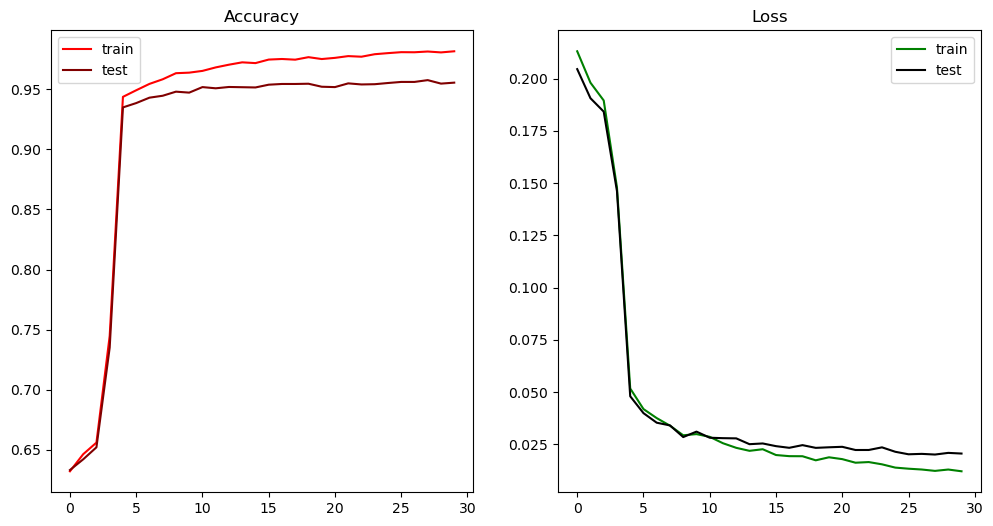

In [87]:
plot_results(results3)

In [88]:
np.max([x[1][1] for x in results3])

0.9576